# Coordinates and Plotting

In this notebook, we will extend our Python toolkit to coordinate transformations and plotting.  This will allow us to represent the same data in multiple ways, and get a broader perspective on what objects in the sky are "really" doing.

## Setup

CoLab is not the easiest place to make interactive plots, but the following generally work.

In [41]:
#!pip install ipympl

# %matplotlib widget
# import matplotlib.pyplot as plt

# plt.figure()
# plt.plot([0, 1, 2], [0, 1, 0])
# plt.show()


In [42]:
#from google.colab import output
#output.enable_custom_widget_manager()


Now, let's import all of the libraries we will need.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import AltAz, SkyCoord, EarthLocation
from astropy.time import Time

In [44]:
# Turn on interactive plotting.
%matplotlib widget

# Disable interactive plotting.
# %matplotlib inline

Now let's define our local observatory.

In [45]:
# Define our location in time and space.
lattitude = 42.256
longitude = -121.785
elevation = 1300 * u.m
utc_offset = -8 * u.hour  # Pacific Standard Time

here = EarthLocation.from_geodetic(longitude, lattitude, elevation)
now = Time('2024-1-29 12:00:00') - utc_offset

## Sun and Moon

Our first task will be to look at the sun and moon, as they appear in the sky.  The code below sets up a series of observations at noon each day for one year.

In [46]:
# Create an array of observation times around noon.
# N is the number of years.  step is the number of days between observations.
N = 1
step = 1
interval = np.arange(0,365 * N, step) * u.day
schedule = now + interval

# Create a set of coordinates for our observatory.
world_line = AltAz(obstime=schedule, location=here)

# Find the location of the sun and moon in these coordinates.
sun = coord.get_body("sun", schedule).transform_to(world_line)
moon = coord.get_body("moon", schedule).transform_to(world_line)

# Get observing schedule as "Julian days".
# Measure time from the first observation.
dates = schedule.jd
T = dates - dates[0]

Now let's plot the locations of these objects as they would appear in the sky.

Text(0, 0.5, 'Altitude [°]')

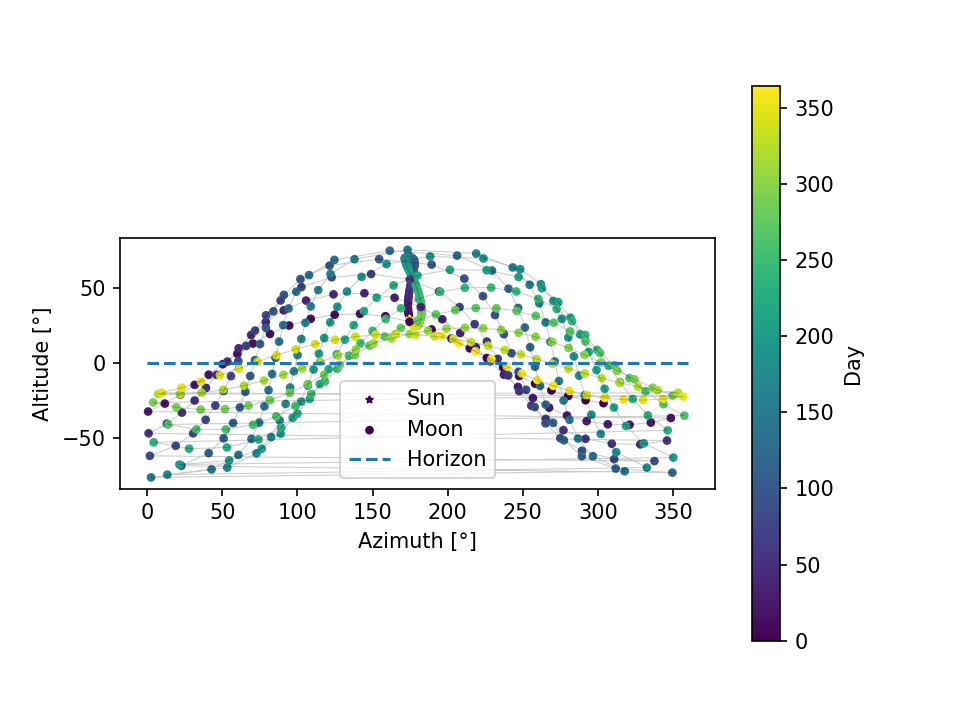

In [48]:
# -----------------------------------------------------------------------------
# Map out altitude and azimuth.
# -----------------------------------------------------------------------------
# Create a figure.
fig, ax = plt.subplots(dpi=150)

# Plot the sun and moon locations.
# Scatter draws the points.  Plot draws lines.
cdata = ax.scatter(sun.az.value, sun.alt.value, c=T, marker='*', s=10, label='Sun')
ax.plot(sun.az.value, sun.alt.value, 'k-', lw=0.5, alpha=0.2)
ax.scatter(moon.az.value, moon.alt.value, c=T, marker='o', s=10, label='Moon')
ax.plot(moon.az.value, moon.alt.value, 'k-', lw=0.5, alpha=0.2)

# Draw a line to indicate the horizon.
ax.hlines(0, 0, 360, ls='--', label='Horizon')

# Now adjust the plot and label everything.
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Day")
ax.set_xlabel("Azimuth [°]")
ax.set_ylabel("Altitude [°]")

-----

## **Your Turn**

Work with the code above to accomplish the following tasks and answer the following questions.

(a) Use comments ("`#`") to plot only the sun.  It will display the position of the sun at noon each day for the coming year.

Describe the pattern the sun makes in the sky.

Why isn't the sun at the same place in the sky at noon each day?
Why does it make the pattern you see?

The sun makes a figure 8 in the sky over the course of a year, which google says is called an analemma. It isn't in the same place every day because it will be higher in the summer months and lower in the winter months, and tilts East or West due to the elliptical nature of Earth's orbit.

(b) Use comments ("`#`") to plot only the moon.  It will display the position of the moon at noon each day for the coming year.

Describe the pattern the moon makes in the sky.

Why isn't the moon at the same place in the sky at noon each day?
Why does it make the pattern you see?

The moon has a sort of upside-down parabola with scattered points making up the curve. This is because the moon orbits Earth much faster than Earth orbits the sun, completing a cycle in 29 and 1/2 days. This makes its position in the sky change significantly from day by day.

The moon also goes through its phases, which changes its visibility and position at noon. The moon's orbit is also tilted relative to Earth's orbit around the sun, causing its altitude to vary more than the sun's does. 

We can also represent the positions in three dimensions.

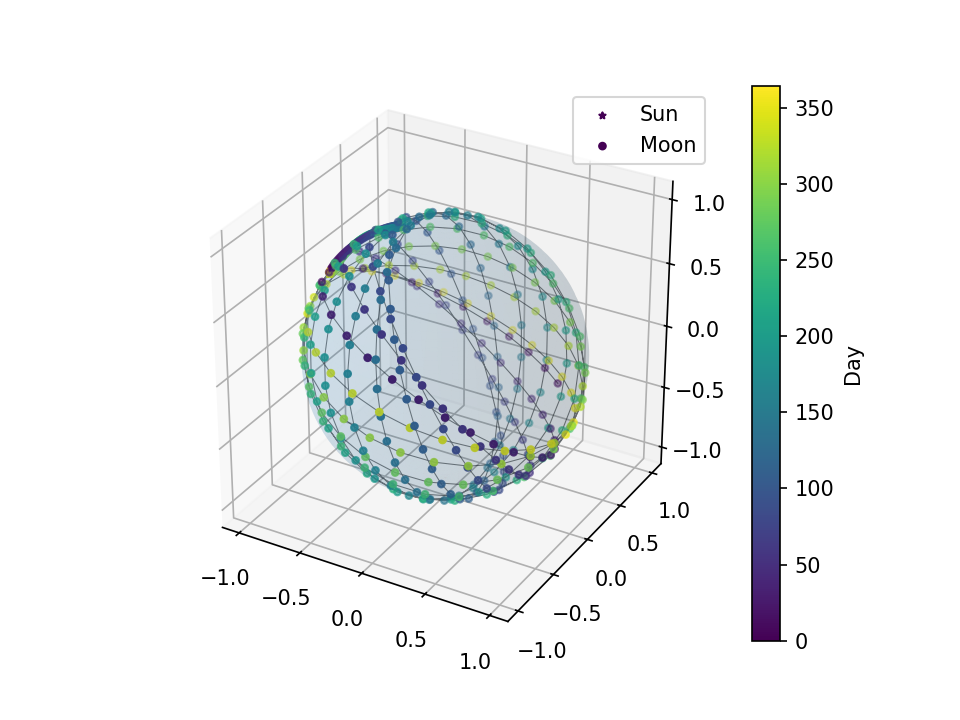

In [51]:
# -----------------------------------------------------------------------------
# Plot in the local sky.
# -----------------------------------------------------------------------------
# Define a function to convert from AltAz coordinates to Cartesian coordinates.
def unit_sphere(data):
    """
    Convert lattitude and longitude to coordinates on the unit sphere.
    """
    theta = np.radians(90 - data.alt.value)
    phi = -np.radians(data.az.value)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return x,y,z


fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

# Draw the celestial sphere.
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
r = 0.995
x = r * np.outer(np.cos(phi), np.sin(theta))
y = r * np.outer(np.sin(phi), np.sin(theta))
z = r * np.outer(np.ones(np.size(phi)), np.cos(theta))
ax.plot_surface(x, y, z, alpha=0.1)

# Add the sun.
X,Y,Z = unit_sphere(sun)
cdata = ax.scatter(X,Y,Z, c=T, marker='*', s=10, label='Sun')
ax.plot(X,Y,Z, 'k-', lw=0.5, alpha=0.5)

# Add the moon.
X,Y,Z = unit_sphere(moon)
ax.scatter(X,Y,Z, c=T, marker='o', s=10, label='Moon')
ax.plot(X,Y,Z, 'k-', lw=0.5, alpha=0.5)

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Day")

-----

## **Your Turn**

This is the same information, displayed in a different coordinate system.  What does it reveal about the motion of the sun and the moon in the sky?

___REPLACE WITH YOUR RESPONSE.___

## Planetary Motion

Copy and paste the code above in the space below as needed.  Modify it to make a similar 3D plot for the motion of the other visible planets:
- Mercury
- Venus
- Mars
- Jupiter
- Saturn

Adjust the observing period to see a complete cycle for each planet.  Add more days between observations to reduce the size of the array for plotting.

(You can plot the planets separately, or on the same plot.)

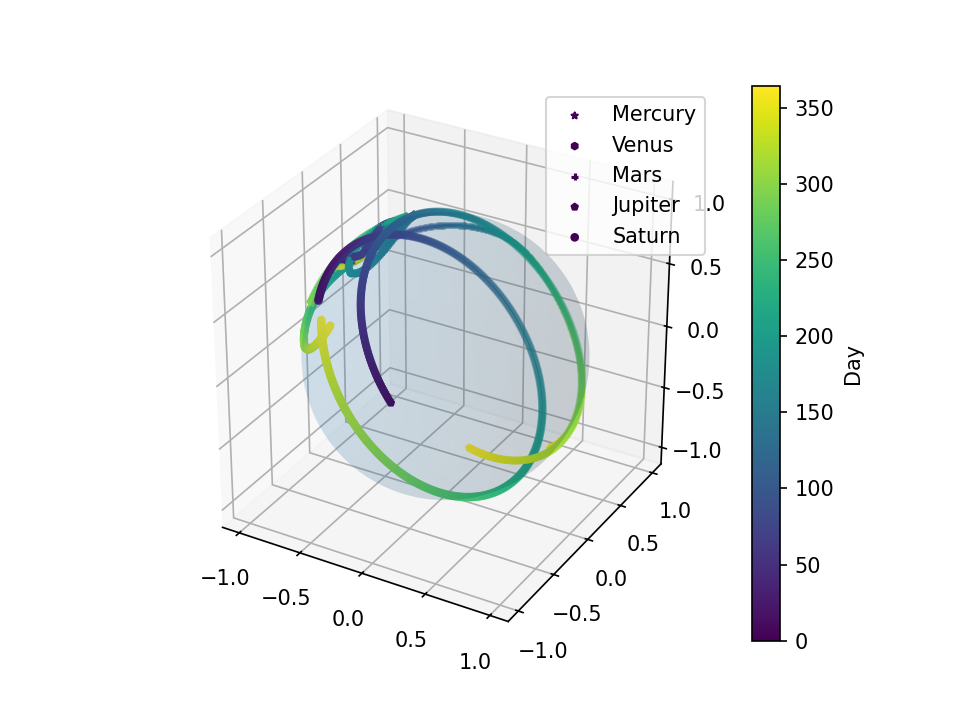

In [56]:
# -----------------------------------------------------------------------------
# Plot in the local sky.
# -----------------------------------------------------------------------------
# Define a function to convert from AltAz coordinates to Cartesian coordinates.
def unit_sphere(data):
    """
    Convert lattitude and longitude to coordinates on the unit sphere.
    """
    theta = np.radians(90 - data.alt.value)
    phi = -np.radians(data.az.value)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return x,y,z


fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

# Draw the celestial sphere.
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
r = 0.995
x = r * np.outer(np.cos(phi), np.sin(theta))
y = r * np.outer(np.sin(phi), np.sin(theta))
z = r * np.outer(np.ones(np.size(phi)), np.cos(theta))
ax.plot_surface(x, y, z, alpha=0.1)

# Create a set of coordinates for our observatory.
world_line = AltAz(obstime=schedule, location=here)

# Find the location of the Planets in these coordinates.
Mercury = coord.get_body("Mercury", schedule).transform_to(world_line)
Venus = coord.get_body("Venus", schedule).transform_to(world_line)
Mars = coord.get_body("Mars", schedule).transform_to(world_line)
Jupiter = coord.get_body("Jupiter", schedule).transform_to(world_line)
Saturn = coord.get_body("Saturn", schedule).transform_to(world_line)

# Add Mercury.
X,Y,Z = unit_sphere(Mercury)
cdata = ax.scatter(X,Y,Z, c=T, marker='*', s=10, label='Mercury')
ax.plot(X,Y,Z, 'k-', lw=0.5, alpha=0.25)

# Add Venus.
X,Y,Z = unit_sphere(Venus)
ax.scatter(X,Y,Z, c=T, marker='h', s=10, label='Venus')
ax.plot(X,Y,Z, 'k-', lw=0.6, alpha=0.375)

# Add Mars.
X,Y,Z = unit_sphere(Mars)
ax.scatter(X,Y,Z, c=T, marker='+', s=10, label='Mars')
ax.plot(X,Y,Z, 'k-', lw=0.2, alpha=0.625)

# Add Jupiter.
X,Y,Z = unit_sphere(Jupiter)
ax.scatter(X,Y,Z, c=T, marker='p', s=10, label='Jupiter')
ax.plot(X,Y,Z, 'k-', lw=0.8, alpha=0.5)

# Add Saturn.
X,Y,Z = unit_sphere(Saturn)
ax.scatter(X,Y,Z, c=T, marker='o', s=10, label='Saturn')
ax.plot(X,Y,Z, 'k-', lw=0.375, alpha=0.75)

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Day")

Something easy to notice is the difference between the bodies. The moon has a very regular motion around the sphere, while mercury makes a shape more similar to how the sun does (but more erratic and spread out). I find it interesting how different the mapped motions of the bodies are. Compare Saturn to Mercury, for instance.

-----

# Ptolemy

The celestial sphere is the view of the night sky from earth.  It looks like everything goes around the earth.

Instead of projecting objects onto the celestial sphere, let's look at their positions in three dimensions, using ***geocentric coordinates.***

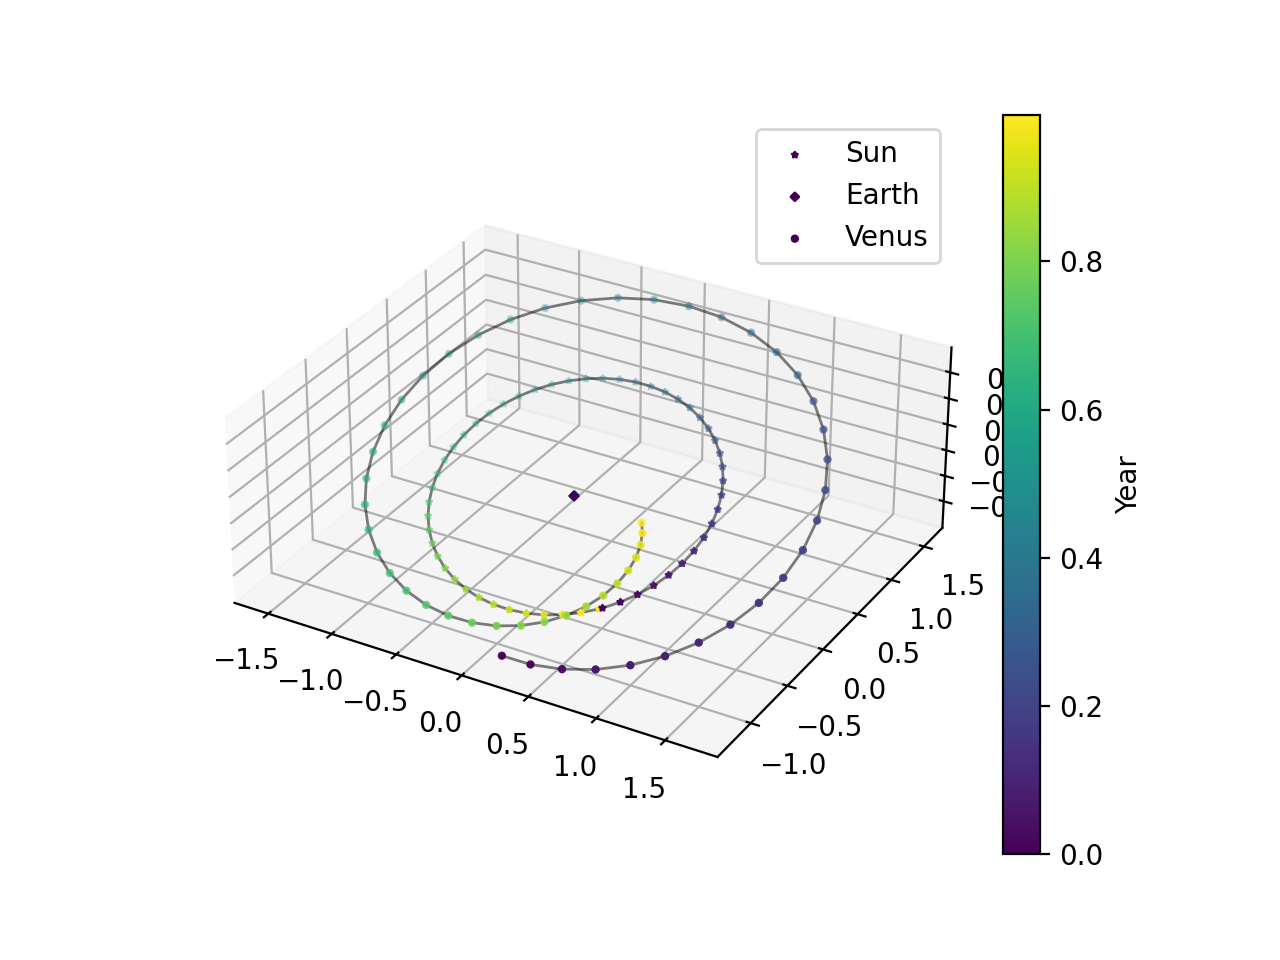

In [57]:
# -----------------------------------------------------------------------------
# Now let's look at where things "really" are in space.
# -----------------------------------------------------------------------------
# Create an array of observing times.
N = 1
step = 7
interval = np.arange(0,365*N,step) * u.day
schedule = now + interval

# Get observing schedule as "Julian dates", in years.
dates = schedule.jd
T = (dates - dates[0])/365

# Find the location of the sun, earth, and a planet in geocentric coordinates.
sun = coord.get_body("sun", schedule)
earth = coord.get_body("earth", schedule)

planet_name = "Venus"
planet = coord.get_body(planet_name, schedule)

# Plot in earth coordinate system.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

# Add the sun.
# The line below converts sky coordinates to Cartesian coordinates.
X,Y,Z = sun.represent_as(coord.CartesianRepresentation).get_xyz()
cdata = ax.scatter(X,Y,Z, c=T, marker='*', s=4, label='Sun')
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add the earth.
X,Y,Z = earth.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='D', s=4, label='Earth')
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add the planet.
X,Y,Z = planet.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=planet_name)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Year")



-----

## **Your Turn**

Explore the motions of the five visible planets in this coordinate system.  Adjust the number of years and the interval between observations as needed to get a full picture of their motion.

(a) Describe the Sun's motion in this reference frame.

In this reference frame, the Earth is stationary and the sun moves around it. This means that what we see is actually the Earth going around the sun, with a standard eliptical orbit. The sun gets slightly closer or further depending on which part of the year it is.

(b) The planets do not move in circular paths around the earth.  Describe the paths they actually follow.

Because the Earth is moving, the planets are moving in complex paths. They normally move West to East, but sometimes they'll move East to West. This is called retrograde. Because all the planets move around the sun, They have epicycles in relation to the earth.

-----

# Copernicus

Copernicus suggested that the sun, rather than the earth, might be a natural center for motion.  Galileo and Kepler endorsed this idea, too.  Let's plot the motion of the planets in ***heliocentric coordinates*** to see why.

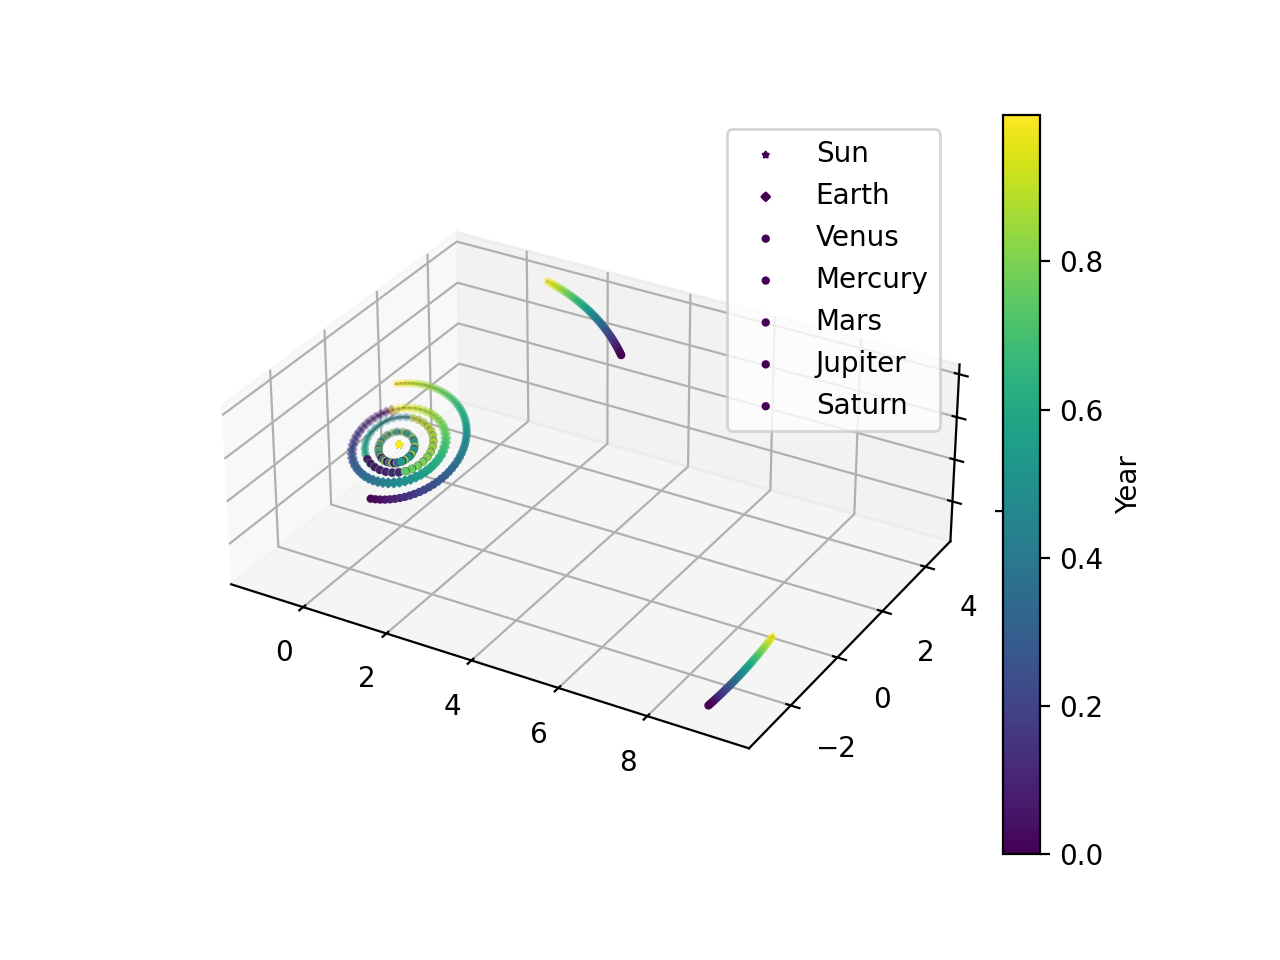

In [60]:
# -----------------------------------------------------------------------------
# Now let's look at where things "really" are in space.
# -----------------------------------------------------------------------------
# Create an array of observing times.
N = 1
step = 7
interval = np.arange(0,365*N,step) * u.day
schedule = now + interval

# Get observing schedule as "Julian dates", in years.
dates = schedule.jd
T = (dates - dates[0])/365

# Find the location of the sun, earth, and a planet in heliocentric coordinates.
sun = coord.get_body_barycentric("sun", schedule)
earth = coord.get_body_barycentric("earth", schedule)

Venus = "Venus"
venus = coord.get_body_barycentric(Venus, schedule)

Mars = "Mars"
mars = coord.get_body_barycentric(Mars, schedule)

Mercury = "Mercury"
mercury = coord.get_body_barycentric(Mercury, schedule)

Jupiter = "Jupiter"
jupiter = coord.get_body_barycentric(Jupiter, schedule)

Saturn = "Saturn"
saturn = coord.get_body_barycentric(Saturn, schedule)

# Plot in earth coordinate system.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

# Add the sun.
# The line below converts sky coordinates to Cartesian coordinates.
X,Y,Z = sun.represent_as(coord.CartesianRepresentation).get_xyz()
cdata = ax.scatter(X,Y,Z, c=T, marker='*', s=4, label='Sun')
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add the earth.
X,Y,Z = earth.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='D', s=4, label='Earth')
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add Venus.
X,Y,Z = venus.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=Venus)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add Mercury.
X,Y,Z = mercury.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=Mercury)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add Mars.
X,Y,Z = mars.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=Mars)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add the Jupiter.
X,Y,Z = jupiter.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=Jupiter)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)

# Add Saturn.
X,Y,Z = saturn.represent_as(coord.CartesianRepresentation).get_xyz()
ax.scatter(X,Y,Z, c=T, marker='o', s=4, label=Saturn)
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)The

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Year")

-----

## **Your Turn**

Explore the motions of the five visible planets in this coordinate system.  Adjust the number of years and the interval between observations as needed to get a full picture of their motion.

(a) Describe the Sun's motion in this reference frame.

The sun is centered in this reference frame. This is because it's more accurate to the motion of the planets.

(b) Describe the Earth's motion in this reference frame.

In this reference frame, the Earths motion should be directly analogous to the real motion of the earth relative to the sun

(c) Describe the other planets' motion in this reference frame.

After Earth, the planets break down in this model. It still shows their real orbits, but it's unable to show it fully. This is because they are massive, you can see arcs based on their orbit out further than Earth.

-----

# Final Thoughts

We are free to use whatever coordinate system we want to represent the data.


- Is one frame of reference "better" than the others?
- Does one seem "more natural" to you?

In my view, the orbit of the planets around the sun is the only one I instantly understood. However, I think that the Ptolemy view is the best frame of reference we used here to visualize the planets motion relative to one another. However, I think the map of the planets relative to the Earths sky is also extremely valvuable to astronomy because it allows us to guide and understand a view relative to us, the observer.


What are the advantages and disadvantages of the representations we've looked at in this notebook?

- sky coordinates (the celestial sphere)
- geocentric coordinates
- heliocentric coordinates

The sky coordinates are how we would see the sky if we looked with our eyes, but it doesn't tell you much information about where it is in the solar system. 
The geocentric coordinates are good because they have an Earth-perspective, but it's somewhat misleading in an astronomy context because everything revolves around Earth - however, this is how ancient astronomers would view the universe.
The heliocentric coordinates are good because it shows how our planets acutally orbit the sun, but they are more complex and take up more space than the other coordinates. This means it can be difficult to see important information about say, mercury.

-----

# Further Exploration


## Barycentric Coordinates

The heliocentric plots we made are actually "barycentric".  Make a plot of just the Sun.

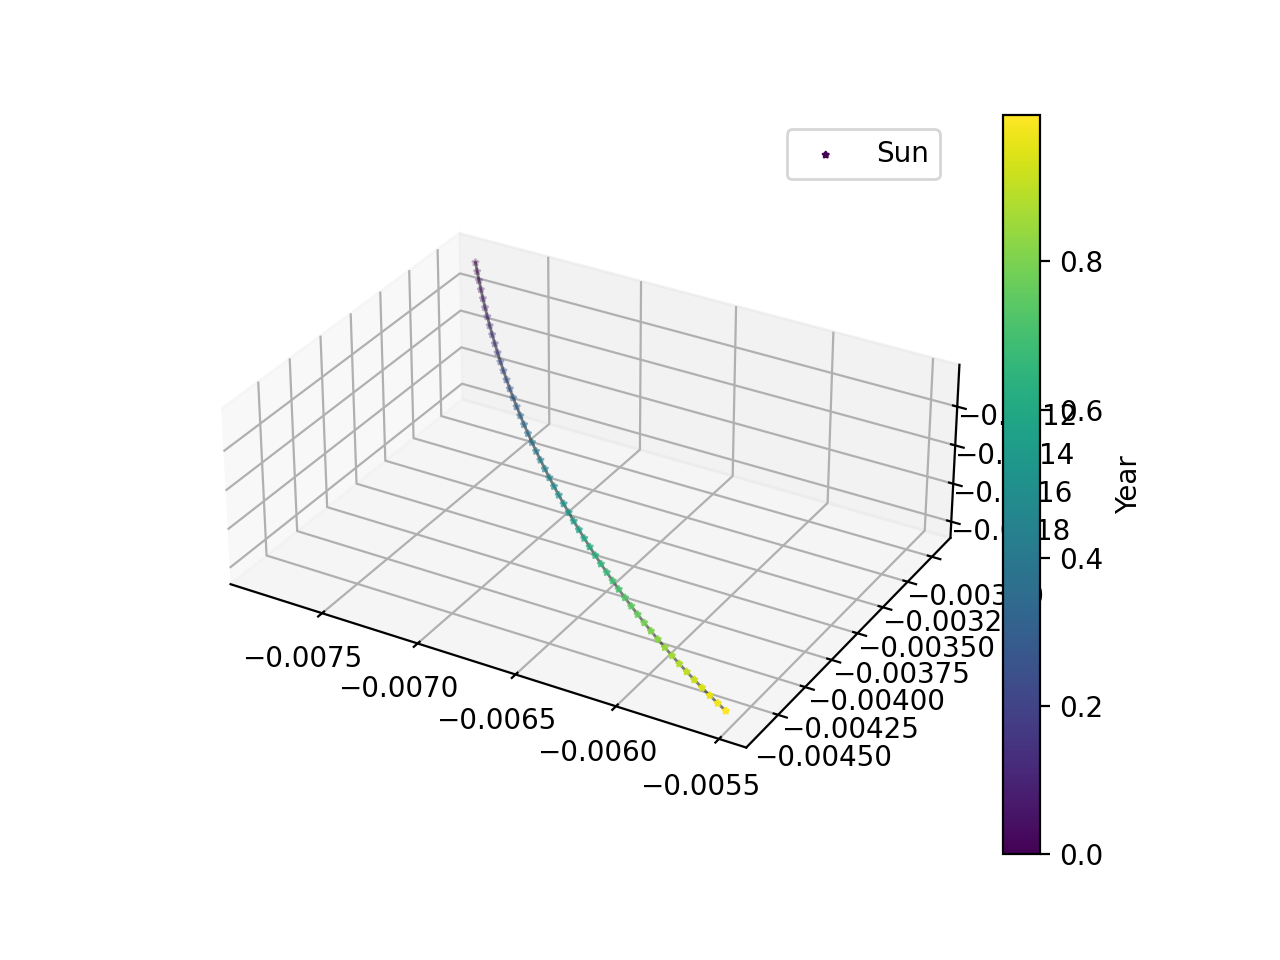

In [62]:
# -----------------------------------------------------------------------------
# Now let's look at where things "really" are in space.
# -----------------------------------------------------------------------------
# Create an array of observing times.
N = 1
step = 7
interval = np.arange(0,365*N,step) * u.day
schedule = now + interval

# Get observing schedule as "Julian dates", in years.
dates = schedule.jd
T = (dates - dates[0])/365

# Find the location of the sun, earth, and a planet in heliocentric coordinates.
sun = coord.get_body_barycentric("sun", schedule)

# Plot in earth coordinate system.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

# Add the sun.
# The line below converts sky coordinates to Cartesian coordinates.
X,Y,Z = sun.represent_as(coord.CartesianRepresentation).get_xyz()
cdata = ax.scatter(X,Y,Z, c=T, marker='*', s=4, label='Sun')
ax.plot(X,Y,Z, 'k-', lw=1, alpha=0.5)


# Set an equal aspect ratio
ax.set_aspect('equal')
ax.legend()
cbar = fig.colorbar(cdata)
cbar.set_label("Year")

  What do you see?  Why?

What I see is a slight shift of the sun over time. I honestly couldnt figure out why, so I asked my friend chat and they said:

Solar System Barycenter: The barycenter is the common center of mass around which all solar system objects orbit, including the Sun. It is located near or within the Sun for most of the time but not exactly at the Sun's center. The precise location of the barycenter changes due to the gravitational influences of the planets, especially Jupiter and Saturn, which are massive and have significant leverage due to their distance from the Sun.

Jupiter and Saturn's Influence: These gas giants are massive enough to pull the solar system's barycenter away from the center of the Sun. When Jupiter and Saturn are aligned on the same side of the Sun, their combined gravitational pull has the maximum effect on the position of the barycenter, often pulling it outside the Sun's volume.

Observing the Movement: The plot you've created visualizes this phenomenon by showing the Sun's position relative to the solar system's barycenter. The movement you see—though slight—is the Sun's response to the gravitational tug of the planets, primarily Jupiter and Saturn, as it orbits the barycen

This is saying that Saturn and Jupiter are big enough to slightly shift the center of our solar system away from the sun, which pulls slightly on the sun. Thus the slight shift is seen.ter.

## Kepler's Third Law

Johannes Kepler discovered a relationship between the period of a planet's orbit and its average distance from the sun.

Try to discover it for yourself.

Modify the code in this notebook to determine the period of each planet's motion and its average distance from the sun.  There will be six data points.

Make linear, semilog, and log-log plots of distance versus period.  What kind of relationship do the data suggest?

- **linear plot** | y versus x --- straight line implies linear relationship: $y = A + bx$
- **semilog plot** | log(y) versus x --- straight line implies exponential relationship: $y = A \cdot e^{bx}$
- **log-log plot** | log(y) versus log(x) --- straight line implies power law relationship: $y = A \cdot x^b$

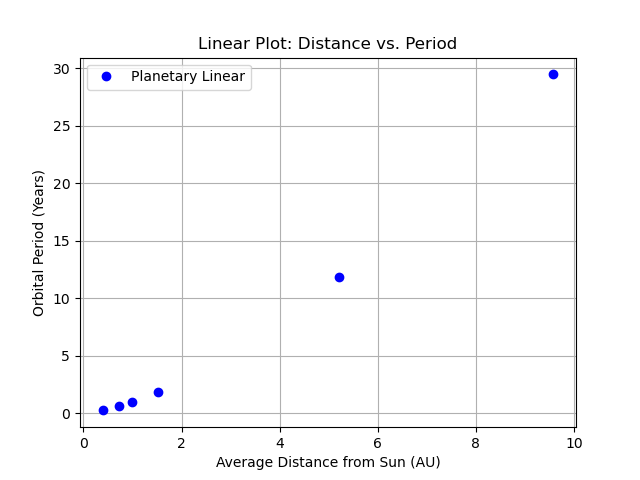

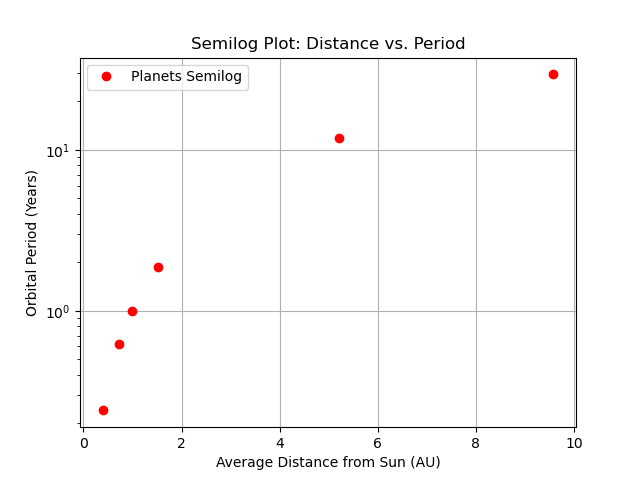

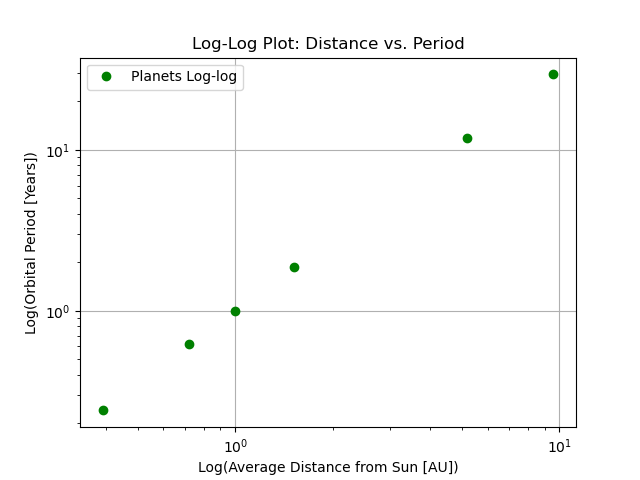

In [65]:
# Individual orbital periods in Earth years
mercury_period = 0.24
venus_period = 0.62
earth_period = 1.0
mars_period = 1.88
jupiter_period = 11.86
saturn_period = 29.46

# Individual distances from the Sun (AU)
mercury_distance = 0.39
venus_distance = 0.72
earth_distance = 1.0
mars_distance = 1.52
jupiter_distance = 5.20
saturn_distance = 9.58


periods = np.array([mercury_period, venus_period, earth_period, mars_period, jupiter_period, saturn_period])
distances = np.array([mercury_distance, venus_distance, earth_distance, mars_distance, jupiter_distance, saturn_distance])


# Linear plot
plt.figure()
plt.plot(distances, periods, 'bo', label='Planetary Linear')
plt.xlabel('Average Distance from Sun (AU)')
plt.ylabel('Orbital Period (Years)')
plt.title('Linear Plot: Distance vs. Period')
plt.legend()
plt.grid(True)
plt.show()

# Semilog plot (logarithmic y-axis)
plt.figure()
plt.semilogy(distances, periods, 'ro', label='Planets Semilog')
plt.xlabel('Average Distance from Sun (AU)')
plt.ylabel('Orbital Period (Years)')
plt.title('Semilog Plot: Distance vs. Period')
plt.legend()
plt.grid(True)
plt.show()

# Log-log plot
plt.figure()
plt.loglog(distances, periods, 'go', label='Planets Log-log')
plt.xlabel('Log(Average Distance from Sun [AU])')
plt.ylabel('Log(Orbital Period [Years])')
plt.title('Log-Log Plot: Distance vs. Period')
plt.legend()
plt.grid(True)
plt.show()


## The Ecliptic

The plots above showed the motion of planets in the night sky, as observed from Klamath Falls.

Adapt the code to display the motion of the sun, mooon, and planets on the celestial sphere.  That is, instead of using altitude and azimuth to plot their locations, use right ascension and declination.

The path of the sun is called ___the ecliptic___, and it is used to define the celestial coordinate system.

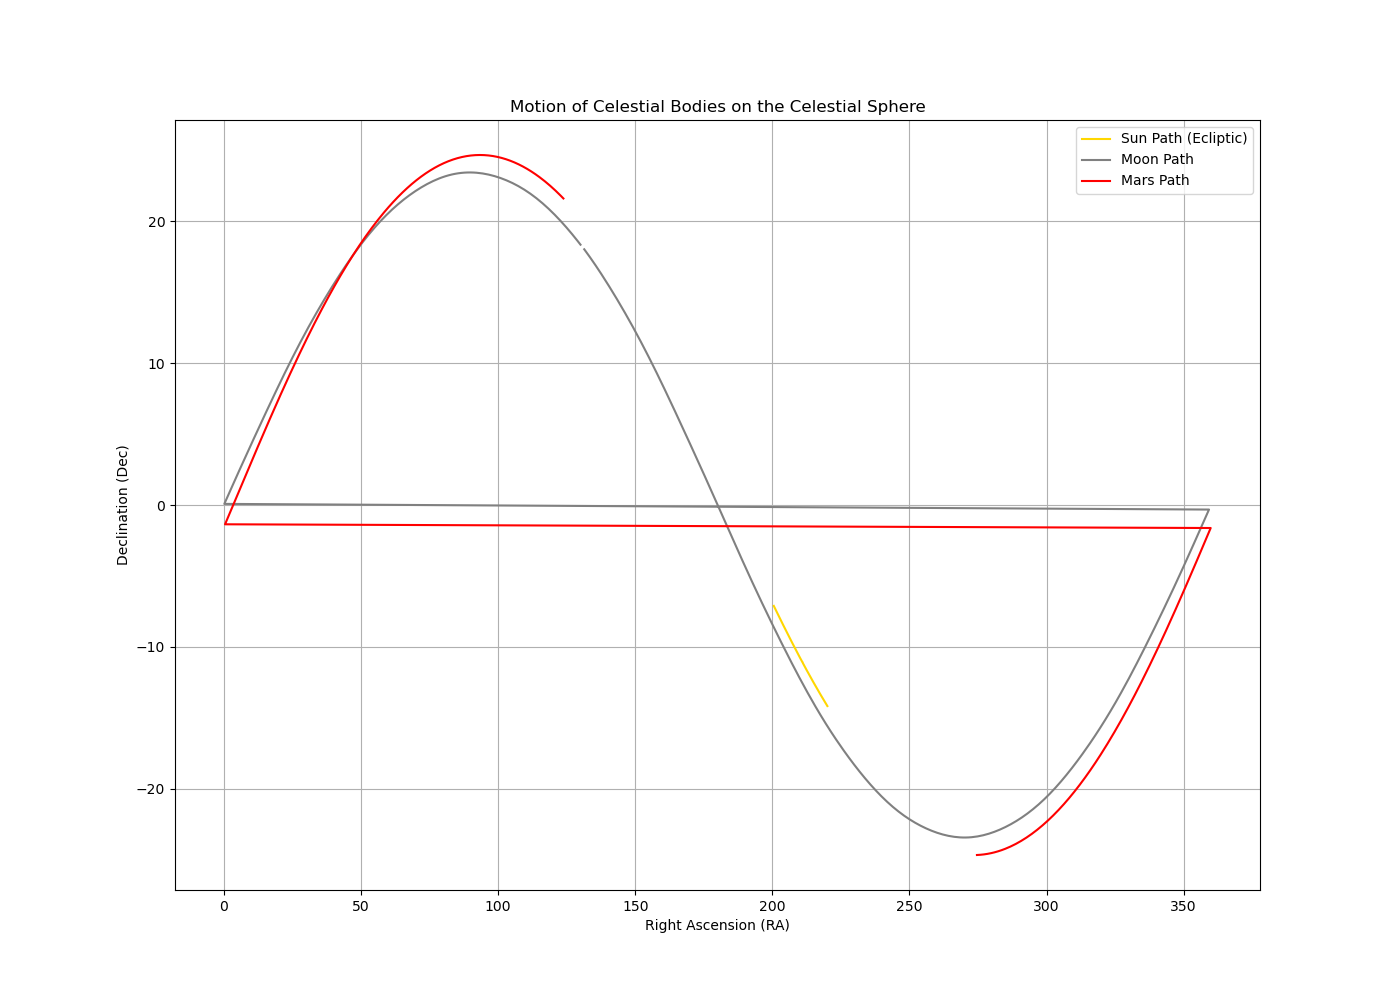

In [70]:
from astropy.coordinates import solar_system_ephemeris, get_body, AltAz, EarthLocation, SkyCoord
from astropy.time import Time
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np


# Define our location in time and space.
longitude = -121.785 * u.deg
elevation = 1300 * u.m
location = EarthLocation(lat=latitude, lon=longitude, height=elevation)
now = Time('2024-01-29 12:00:00') - 8 * u.hour  #Pacific Standard Time

# Create an array of observation times around noon.
# N is the number of years.  step is the number of days between observations.latitude = 42.256 * u.deg
N = 1  
step = 1  
interval = np.arange(0, 365 * N, step) * u.day
schedule = now + interval

# Use the 'builtin' ephemeris. This part was not so easy.
with solar_system_ephemeris.set('builtin'):
    # Calculate RA and Dec for Sun and Moon
    sun = get_body('sun', schedule, location).transform_to('icrs')
    moon = get_body('moon', schedule, location).transform_to('icrs')
    
    # You can add planets here following the same pattern. I will add Mars for example.
    mars = get_body('mars', schedule, location).transform_to('icrs')

plt.figure(figsize=(14, 10))

plt.plot(sun.ra, sun.dec, '-', color='gold', label='Sun Path (Ecliptic)')
plt.plot(moon.ra, moon.dec, '-', color='gray', label='Moon Path')
plt.plot(mars.ra, mars.dec, '-', color='red', label='Mars Path')

plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Motion of Celestial Bodies on the Celestial Sphere')
plt.legend()
plt.grid(True)
plt.show()
